# The Cost of an Undergraduate Education (2021)
### A look at costs per state, per type, and per length

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

**Import csv file and display initial dataframe**

In [2]:
school_df = pd.read_csv("data_sources/nces330_20.csv")
school_df = school_df.dropna()
school_df = school_df.rename(columns={"Value": "Cost"})
school_df.head()

,Year,State,Type,Length,Expense,Cost
0,2013,Alabama,Private,4-year,Fees/Tuition,13983
1,2013,Alabama,Private,4-year,Room/Board,8503
2,2013,Alabama,Public In-State,2-year,Fees/Tuition,4048
3,2013,Alabama,Public In-State,4-year,Fees/Tuition,8073
4,2013,Alabama,Public In-State,4-year,Room/Board,8473


**Create seperate dataframes for fees/tuition and room/board**

In [3]:
fees_tuition_data = school_df[school_df['Expense'].str.lower().str.contains('fees/tuition')]
fees_tuition_data['Expense'] = fees_tuition_data['Expense'].str.replace('Room/Board', '')
fees_tuition_data.reset_index(drop = True, inplace = True)

room_board_data = school_df[school_df['Expense'].str.lower().str.contains('room/board')]
room_board_data['Expense'] = room_board_data['Expense'].str.replace('Fees/Tuition', '')
room_board_data.reset_index(drop = True, inplace = True)


**Further separate frames into private and public institutions**

In [4]:
school_private = fees_tuition_data[fees_tuition_data["Type"] == "Private"].groupby(["State"]).max()
school_private = school_private.sort_values(by="Cost")
school_private = school_private[school_private["Year"] == 2021]
del school_private["Year"]

school_public = fees_tuition_data[fees_tuition_data["Type"] != "Private"].groupby(["State"]).max()
school_public = school_public.sort_values(by="Cost")
school_public = school_public[school_public["Year"] == 2021]
del school_public["Year"]

**Finally, grab the differences between two and four year costs**

In [5]:
school_twoyear = fees_tuition_data[fees_tuition_data["Length"] == "2-year"].groupby(["State"]).max()
school_twoyear = school_twoyear.sort_values(by="Cost")
school_twoyear = school_twoyear[school_twoyear["Year"] == 2021]
del school_twoyear["Year"]

school_fouryear_public = school_public[school_public["Length"] == "4-year"]


## Plot out costs gathered from created DataFrames and compare them to eachother

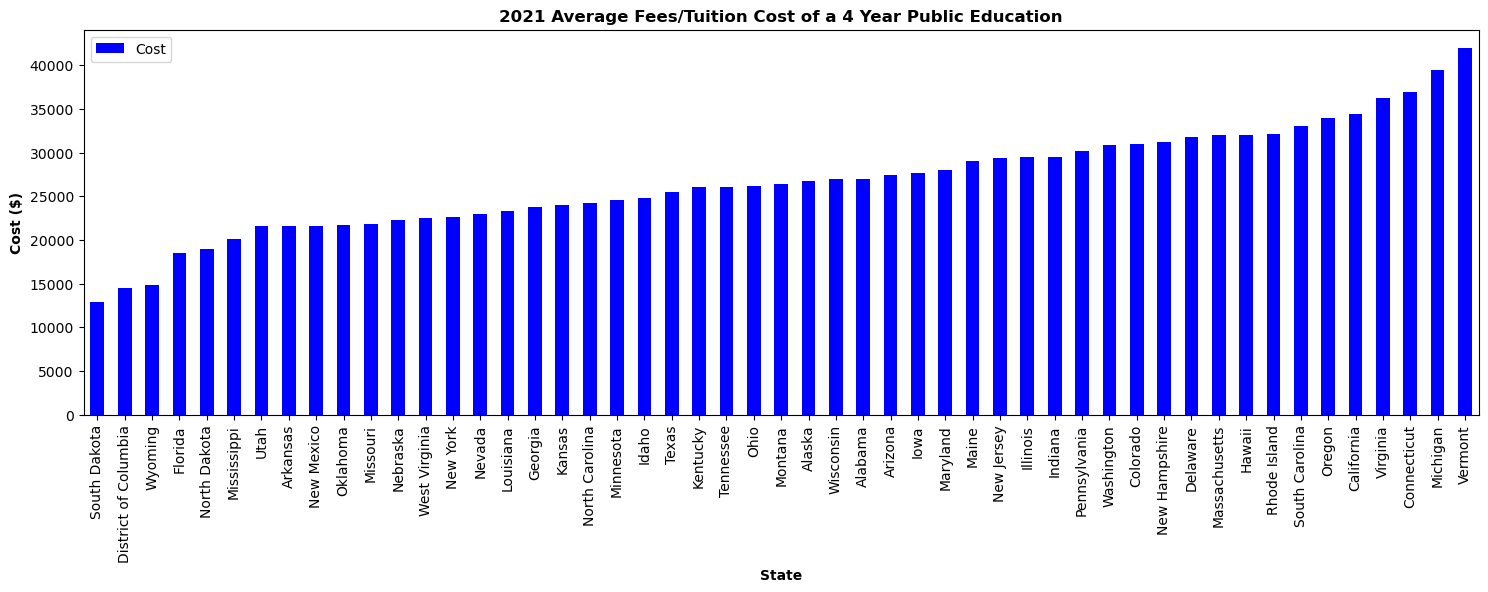

In [6]:
school_fouryear_public.plot.bar(figsize = (18,5), color="blue")
plt.title("2021 Average Fees/Tuition Cost of a 4 Year Public Education", fontweight="bold")
plt.xlabel("State", fontweight="bold")
plt.ylabel("Cost ($)", fontweight="bold")
plt.show()

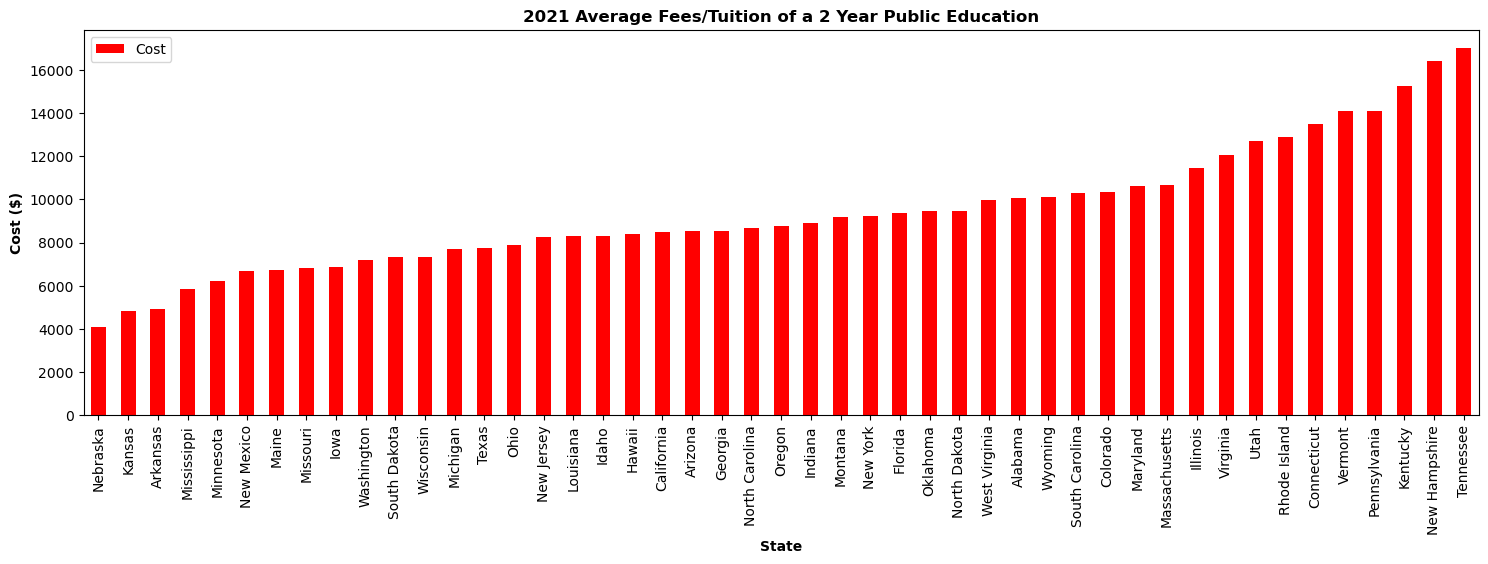

In [7]:
school_twoyear.plot.bar(figsize = (18,5), color="red")
plt.title("2021 Average Fees/Tuition of a 2 Year Public Education", fontweight="bold")
plt.xlabel("State", fontweight="bold")
plt.ylabel("Cost ($)", fontweight="bold")
plt.show()

In [8]:
combined_for_plot = pd.merge(school_fouryear_public, school_twoyear, on="State")
combined_for_plot = combined_for_plot.rename(columns={"Cost_x": "4 Year Cost", "Cost_y": "2 Year Cost"})

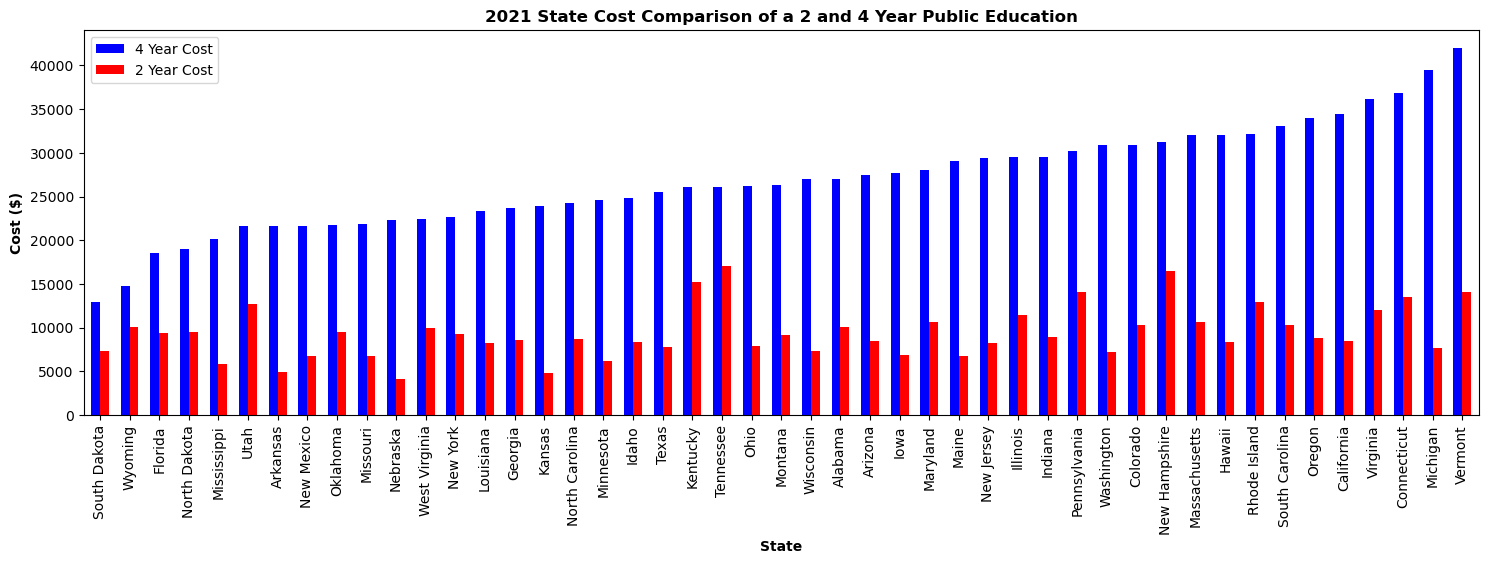

In [9]:
combined_for_plot.plot.bar(figsize = (18, 5), color=["blue", "red"], width = 0.6)
plt.title("2021 State Cost Comparison of a 2 and 4 Year Public Education", fontweight="bold")
plt.ylabel("Cost ($)", fontweight="bold")
plt.xlabel("State", fontweight="bold")
plt.show()

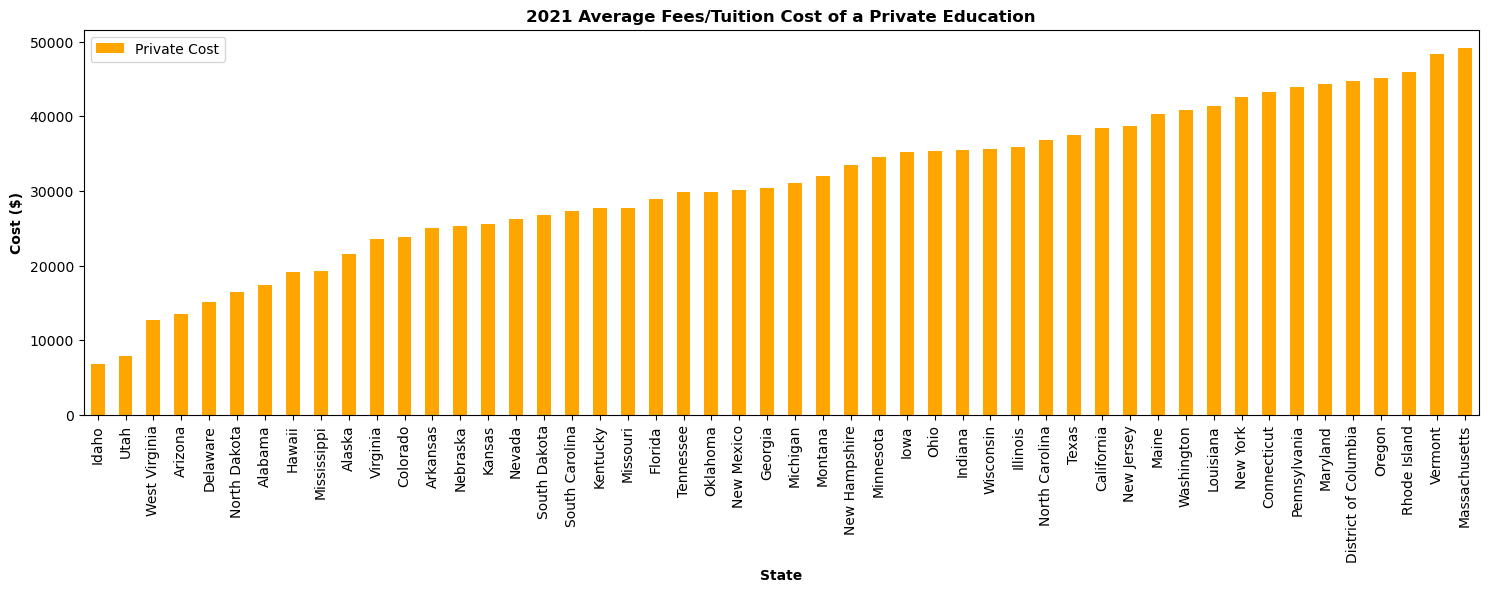

In [10]:
school_private.plot.bar(figsize = (18, 5), color = "orange")
plt.legend(labels=["Private Cost"])
plt.title("2021 Average Fees/Tuition Cost of a Private Education", fontweight = "bold")
plt.ylabel("Cost ($)", fontweight="bold")
plt.xlabel("State", fontweight="bold")
plt.show()

Text(0, 0.5, 'Cost ($)')

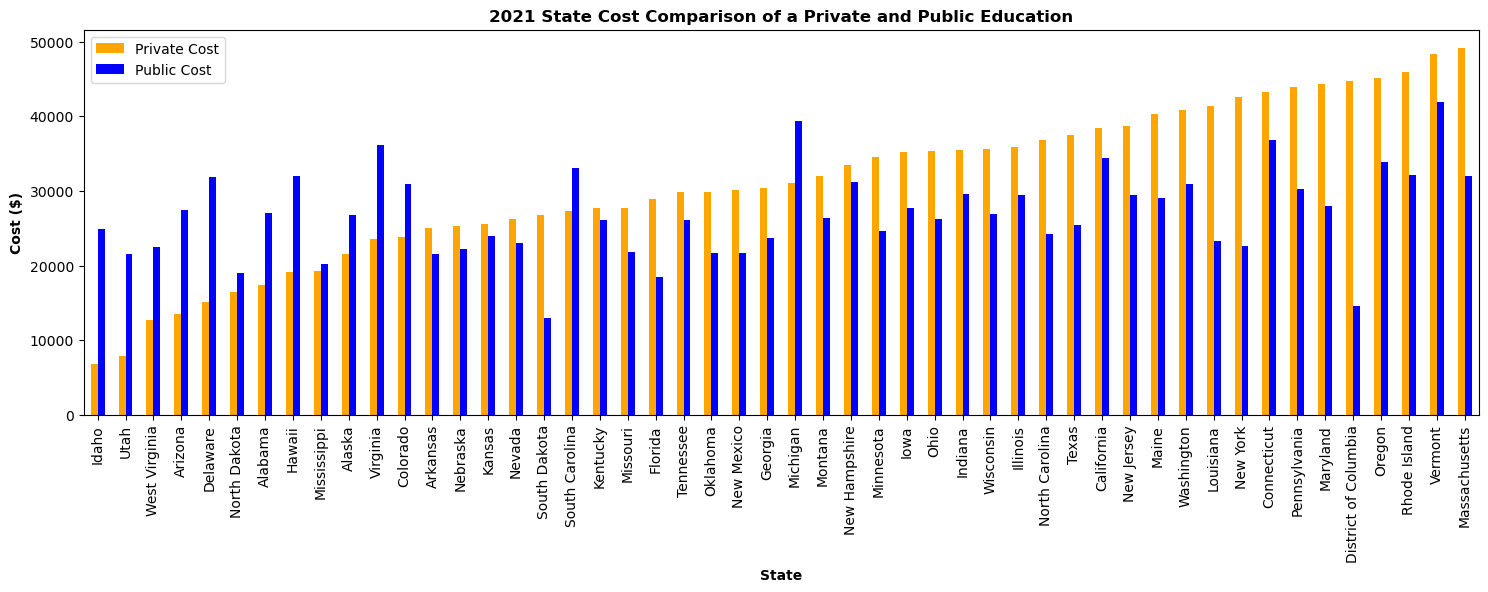

In [11]:
df_combined = pd.concat([school_private, school_fouryear_public], axis=1)
df_combined = df_combined.dropna()
df_combined.plot.bar(figsize = (18, 5), color = ["orange", "blue"])
plt.legend(labels=["Private Cost", "Public Cost"])
plt.title("2021 State Cost Comparison of a Private and Public Education", fontweight = "bold")
plt.xlabel("State", fontweight="bold")
plt.ylabel("Cost ($)", fontweight="bold")